**Importing libraries**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

**Reading the dataset file**

In [0]:
df = pd.read_csv('diabetes.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


**Plotting the counts for the 'Outcome' column (class labels)**

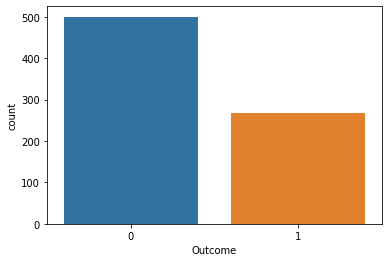

In [0]:
 sb.countplot(x='Outcome', data=df)

**Converting the dataframe into a numpy matrix.**

In [0]:
df_values = df.values

**Shuffling rows of the matrix.**

In [0]:
np.random.shuffle(df_values)

In [0]:
# Splitting the first N-1 columns as X.
x = df_values[:,:-1]

# Splitting the last column as Y.
y = df_values[:, -1].reshape(x.shape[0], 1)

print(x.shape)
print(y.shape)

from sklearn.utils import class_weight

# Computing the class weights.
# Note: This returns an ndarray.
weights = class_weight.compute_class_weight('balanced', np.unique(y), y.ravel()).tolist()

# Converting the ndarray to a dict.
weights_dict = {
    i: weights[i] for i in range(len(weights))
}

print("Class weights: ", weights_dict)

(768, 8)
(768, 1)
Class weights:  {0: 0.768, 1: 1.4328358208955223}


In [0]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation, Input
import keras.regularizers

**Instantiate the model.**

In [0]:
model = Sequential()

# Add the input layer and the output layer.
# The '1' indicates the number of output units.
# The 'input_shape' is where we specify the dimensionality of our input instances.
# The 'kernel_regularizer' specifies the strength of the L2 regularization.
model.add(Dense(1, input_shape=(x.shape[1], ), kernel_regularizer=keras.regularizers.l2(0.017)))

# Adding the BatchNorm layer.
model.add(BatchNormalization())

# Adding the final activation, i.e., sigmoid.
model.add(Activation('sigmoid'))

# Printing the model summary.
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1)                 9         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1)                 4         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 13
Trainable params: 11
Non-trainable params: 2
_________________________________________________________________
None


In [0]:
# Mean, columnar axis.
x_mean = np.mean(x, axis=0, keepdims=True)

# Std. Deviation, columnar axis.
x_std = np.std(x, axis=0, keepdims=True)

# Normalizing.
x = (x - x_mean)/x_std

print(x[:5, :])

[[-0.54791859 -0.68523633 -0.88431425 -0.3472913   0.12330164 -0.93826044
   0.49869316 -1.04154944]
 [ 2.42174604  0.59794663  0.8217115   0.7818138  -0.69289057  0.6863059
  -0.68821348  0.66020563]
 [-0.25095213  0.03459802  0.45982725 -1.28821221 -0.69289057 -1.14133123
  -0.65801229  0.57511787]
 [ 0.04601433 -0.02799627 -0.05715025 -1.28821221 -0.69289057 -0.30366421
   0.71614171  0.06459135]
 [-0.84488505  1.44296956  0.25303625 -0.22183517  0.55744644 -1.09056353
  -0.07512938 -0.0204964 ]]


**Split into Train/test Set**

In [0]:
from sklearn.model_selection import train_test_split

# Split the model into a 0.9-0.1 train-test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=5)

print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (691, 8)
Shape of y_train:  (691, 1)
Shape of x_test:  (77, 8)
Shape of y_test:  (77, 1)


**Compile the Model**

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam')
print('Model compiled!')

Model compiled!


In [0]:
from keras.callbacks import EarlyStopping

# Initialize the Early Stopper.
stopper = EarlyStopping(monitor='val_loss', mode='min', patience=3)

# Fit the data to the model and get the per-batch metric history.
history = model.fit(x_train, y_train, validation_split=0.1, 
                    batch_size=128, epochs=700, 
                    callbacks=[stopper], class_weight=weights_dict, verbose=1)

Train on 621 samples, validate on 70 samples
Epoch 1/700
621/621 [==============================] - 0s 370us/step - loss: 0.8055 - val_loss: 1.0059
Epoch 2/700
621/621 [==============================] - 0s 16us/step - loss: 0.8068 - val_loss: 0.9826
Epoch 3/700
621/621 [==============================] - 0s 17us/step - loss: 0.7990 - val_loss: 0.9629
Epoch 4/700
621/621 [==============================] - 0s 17us/step - loss: 0.7961 - val_loss: 0.9460
Epoch 5/700
621/621 [==============================] - 0s 18us/step - loss: 0.7928 - val_loss: 0.9313
Epoch 6/700
621/621 [==============================] - 0s 19us/step - loss: 0.7916 - val_loss: 0.9184
Epoch 7/700
621/621 [==============================] - 0s 17us/step - loss: 0.7865 - val_loss: 0.9069
Epoch 8/700
621/621 [==============================] - 0s 17us/step - loss: 0.7780 - val_loss: 0.8969
Epoch 9/700
621/621 [==============================] - 0s 16us/step - loss: 0.7812 - val_loss: 0.8877
Epoch 10/700
621/621 [==============

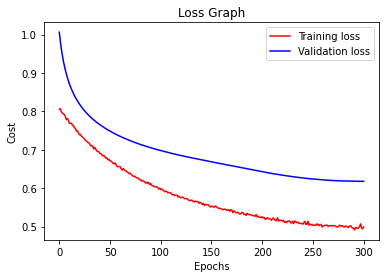

In [0]:
# Plot the training loss.
plt.plot(history.history['loss'], 'r-')

# Plot the validation loss.
plt.plot(history.history['val_loss'], 'b-')

# X-axis label.
plt.xlabel('Epochs')

# Y-axis label.
plt.ylabel('Cost')

# Graph legend.
plt.legend(["Training loss", "Validation loss"])

# Graph title.
plt.title('Loss Graph')

plt.show()